In [6]:
import scanpy, scprep, magic, graphtools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
anndata_primate_raw = scanpy.read_h5ad('../data/processed_files/4_primate_parathyroid_cells_all_genes.h5ad')

# set main data array to be the batch mean corrected counts to avoid visualizing differences between batches
anndata_primate = anndata_primate_raw.copy()
anndata_primate.X = anndata_primate.layers['X_batch_mean']

## vis

In [14]:
sns.set(style='white', font_scale=1.4)

<Axes: title={'center': 'Primate parathyroid cells\nSamples'}, xlabel='PHATE1', ylabel='PHATE2'>

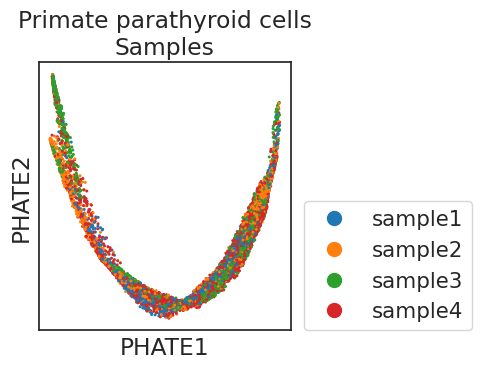

In [26]:
scprep.plot.scatter2d(anndata_primate.obsm['X_phate_mnn'], c=anndata_primate.obs['sample'], label_prefix='PHATE',
                      ticks=None, title=f'Primate parathyroid cells\nSamples', legend_loc=(1.05,0),
                      dpi=200, figsize=(5.2,4), filename='figures/primate_parathyroid/samples.png')

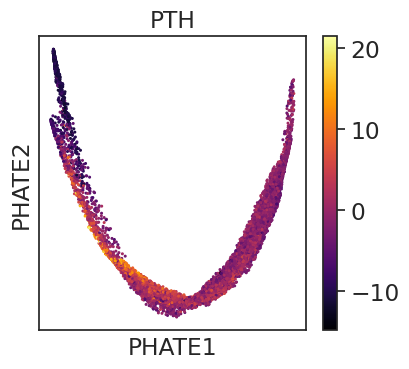

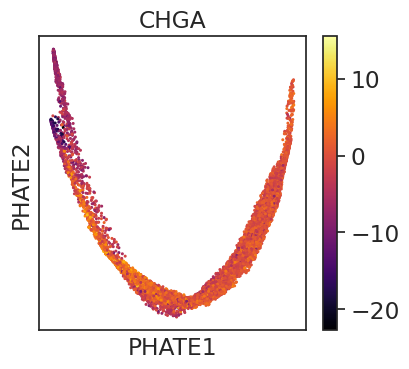

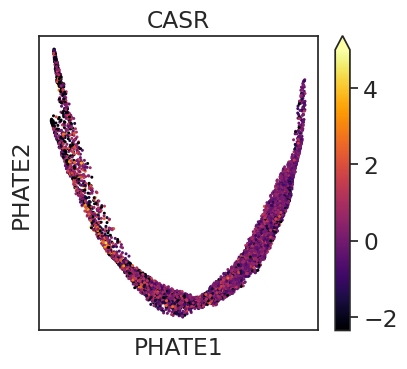

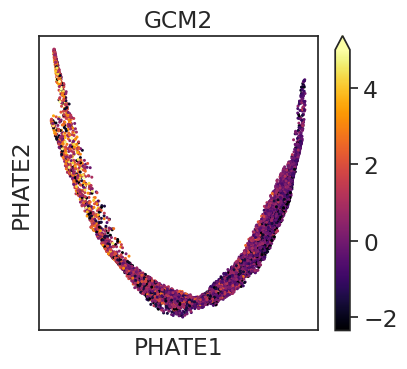

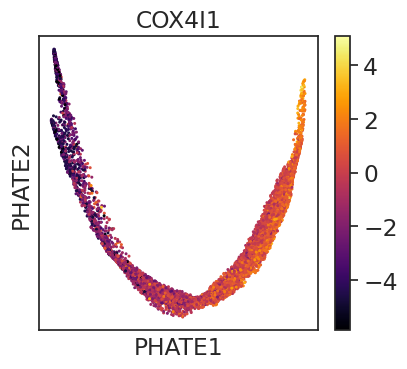

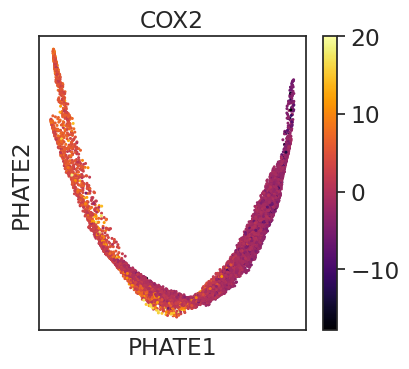

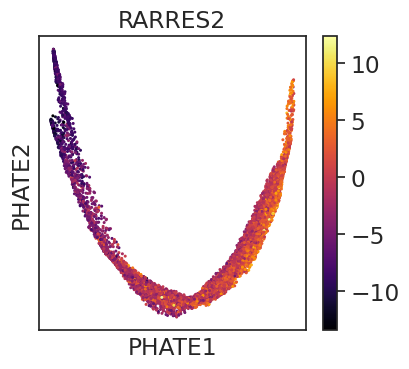

In [29]:
markers = ['PTH', 'CHGA', 'CASR', 'GCM2', 'COX4I1', 'COX2', 'RARRES2']
for marker in markers:
    vmax = None
    if marker == 'GCM2':
        vmax = 5
    if marker == 'CASR':
        vmax= 5
    scprep.plot.scatter2d(anndata_primate.obsm['X_phate_mnn'], c=anndata_primate.to_df()[marker], 
                          ticks=None, title=f'{marker}', label_prefix='PHATE',
                          dpi=200, figsize=(4.4,4), vmax=vmax, filename=f'figures/primate_parathyroid/{marker}.png')

<Axes: title={'center': 'Primate parathryoid cells\nPseudotime'}, xlabel='PHATE1', ylabel='PHATE2'>

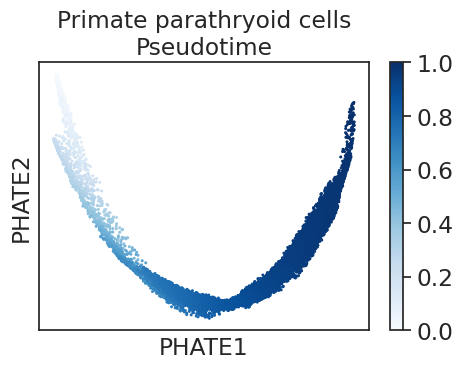

In [20]:
scprep.plot.scatter2d(anndata_primate.obsm['X_phate_mnn'], c=anndata_primate.obs['pseudotime'], label_prefix='PHATE',
                      ticks=None, title=f'Primate parathryoid cells\nPseudotime', cmap='Blues',
                      dpi=200, figsize=(5,4), filename='revision_results/primate_parathyroid/pseudotime.png')

In [30]:
palette = sns.color_palette('Set1')

In [31]:
sns.set(style='white', font_scale=1)

<Axes: xlabel='PHATE1', ylabel='PHATE2'>

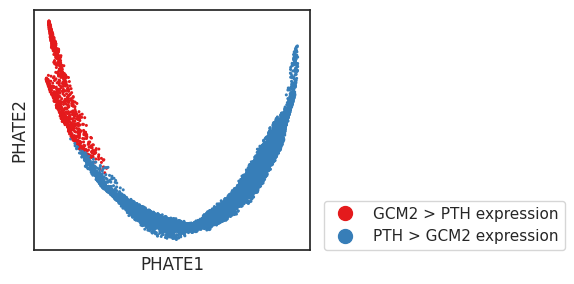

In [33]:
scprep.plot.scatter2d(anndata_primate.obsm['X_phate_mnn'],
                      c=['GCM2 > PTH expression' if x else 'PTH > GCM2 expression' for x in np.round(anndata_primate.obs['pseudotime'], 2) <= 0.42],
                      legend_loc=(1.05,0), ticks=None, label_prefix='PHATE', figsize=(6,3),
                      cmap={'GCM2 > PTH expression': palette[0], 'PTH > GCM2 expression': palette[1]},
                      filename='figures/primate_parathyroid/GCM2_vs_PTH.png', dpi=200)

## Lowly-expressed markers

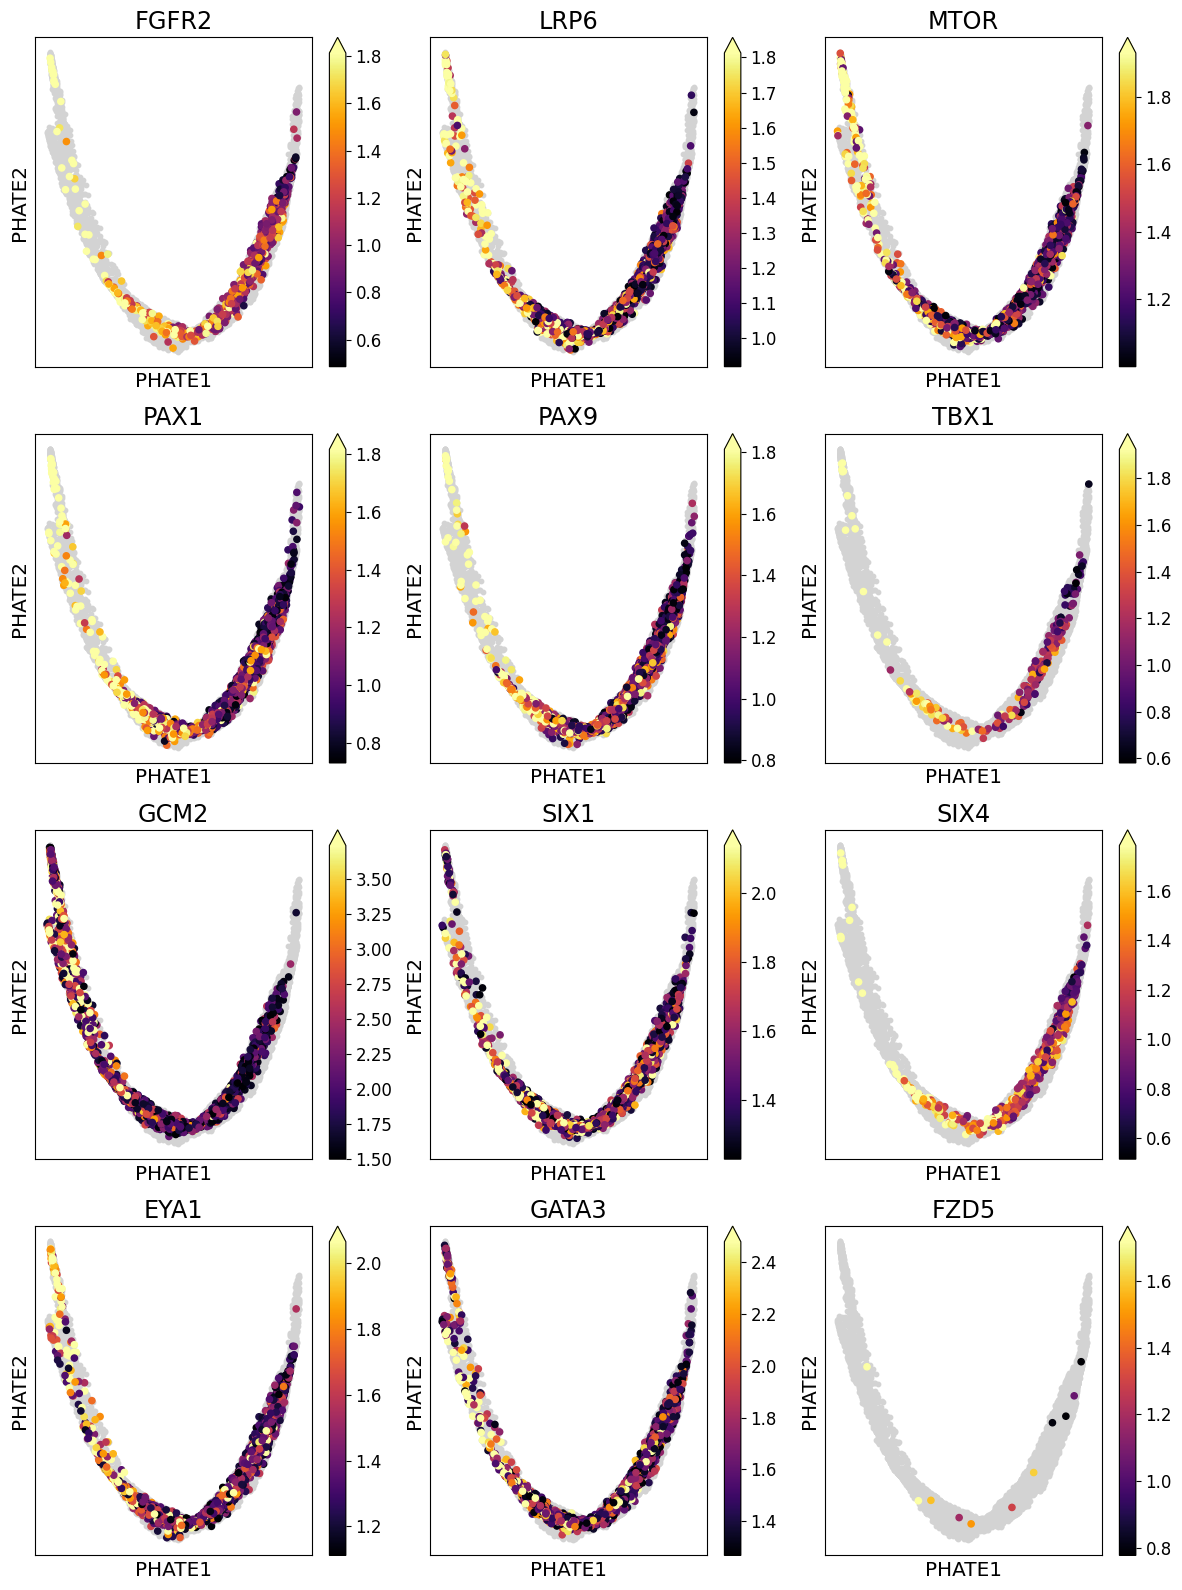

In [7]:
genes= ['FGFR2','LRP6','MTOR','PAX1','PAX9','TBX1','GCM2','SIX1','SIX4','EYA1','GATA3', 'FZD5']

fig, ax = plt.subplots(4,3, figsize=(12,16)); ax=ax.flatten()

for i,gene in enumerate(genes):
    keepCells = scprep.filter.filter_values(anndata_primate, values=(anndata_primate.to_df()[gene]), percentile=90, keep_cells='above')
    perc = np.percentile(keepCells.to_df()[gene], 90)
    
    scprep.plot.scatter2d(anndata_primate.obsm['X_phate_mnn'], c='lightgray',
                          ticks=None, ax=ax[i], title=gene, s=10)
    scprep.plot.scatter2d(keepCells.obsm['X_phate_mnn'], c=keepCells.to_df()[gene], ticks=None, ax=ax[i], title=gene, s=20,
                         label_prefix='PHATE', vmax=perc) 
    
plt.tight_layout()
fig.savefig('figures/primate_parathyroid/top_10%_maturation.png', dpi=200)